<a href="https://colab.research.google.com/github/meafekih/Customer-personality-analysis-ELBOW-BIRCH-/blob/master/MTFstrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install yfinance
!pip install matplotlib 
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


In [8]:
import yfinance as yf
import pandas as pd

In [119]:
ticker = "EURUSD=X"
df  = pd.DataFrame(yf.download(ticker, period='30d', interval='1h')) 

exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

high14 = df['High'].rolling(14).max()
low14 = df['Low'].rolling(14).min()
df['K'] = (df['Close'] - low14)*100/(high14 - low14)
df['D'] = df['K'].rolling(3).mean()

#df=df[['MACD','Signal','K','D']]
df = df.tail(50)

[*********************100%***********************]  1 of 1 completed


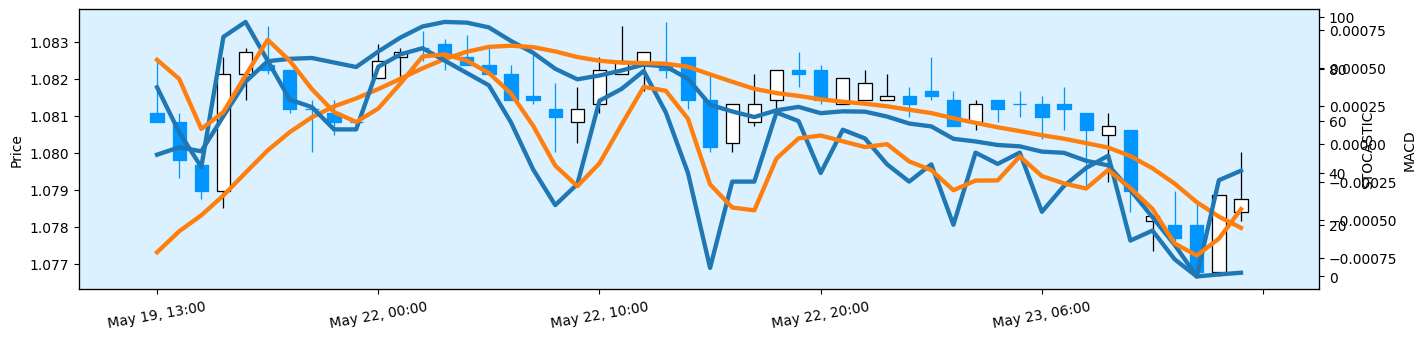

In [120]:
fig = mpf.figure(style='blueskies',figsize=(16,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ap = mpf.make_addplot(df[['MACD','Signal']],ax=ax2,ylabel='MACD')
ap2 = mpf.make_addplot(df[['K','D']],ax=ax3,ylabel='STOCASTIC')

mpf.plot(df,ax=ax1,addplot=[ap,ap2],xrotation=10,type='candle')